In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
gamma = 0.5
pi = 100  # Initial price
mu1 = 0.05  # Drift coefficient
mu0 = 0.01
sigma1 = 0.2  # Volatility coefficient
T = 1.0  # Total time (e.g., 1 year)
dt = 0.01  # Time step
s = 0.5
dinero_maximo = 500
def simulate_stocastic_price_path(pi, mu, sigma, T, dt):
    N = int(T / dt)  # Number of time steps
    t = np.linspace(0, T, N)  # Time grid
    P = np.zeros(N)  # Initialize price array
    P[0] = pi  # Set initial price
    
    for i in range(1, N):
        dZ = np.random.normal(0, np.sqrt(dt))  # Brownian motion increment
        P[i] = P[i-1] + mu * P[i-1] * dt + sigma * P[i-1] * dZ
        # Precio anterior + Cambio Determinista + Cambio aleatorio
    return np.array(t), np.array(P)
def simulate_deterministic_price_path(pi,mu,T,dt):
    N = int(T / dt)  # Number of time steps
    t = np.linspace(0, T, N)  # Time grid
    P = np.zeros(N)  # Initialize price array
    P[0] = pi
    for i in range(1,N):
        P[i] = P[i-1] + mu*+P[i-1] *dt
    return np.array(t),np.array(P)
def xs_mas_cercano(array, objetivo):
    # Asegurarnos de que el array esté ordenado
    array.sort()
    # Inicializar las variables
    menor = None
    mayor = None
    for num in array:
        if num <= objetivo:
            menor = num
        elif num > objetivo and mayor is None:
            mayor = num
            break
    return (menor, mayor)
def func_X1(p_0,p_1,st):
    return st*p_0 + (1-st) *p_1
def func_U(x,gamma):
    return (1/gamma) * x ** gamma
def intercep(U_k1,U_k,x_k,x_k1,x_interpolada):
    if (x_k1-x_k) ==0:
        alfa = 0
        return U_k
    else:
        alfa = (x_interpolada-x_k) / (x_k1-x_k)
        return alfa*U_k1 + (1 - alfa)*U_k
def impulso(xt,sprima,p0_aux,p1_aux):
    x_aux = p0_aux*(sprima)+(1-sprima)*p1_aux 
    if x_aux <=0:
        x_aux = 0
    return   func_U(x_aux,gamma) -10
def M(V_k1,V_K,l_x,x_interpolada,st,p0_aux,p1_aux):
    x_k,x_k1 = xs_mas_cercano(l_x,x_interpolada)
    if x_k1 is  None:
        x_k1 = dinero_maximo
    l_aux = [0] * len(np.arange(0.05,1,0.05))
    num = 0
    posibles_s = np.arange(0.05,1,0.05)

    # p0_auxb = x_interpolada*st
    # p1_auxb = x_interpolada*(1-st)

    for sprima in posibles_s:
        l_aux[num] =  round(intercep(V_k1,V_K,impulso(x_k,sprima,p0_aux,p1_aux),impulso(x_k1,sprima,p0_aux,p1_aux),impulso(x_interpolada,sprima,p0_aux,p1_aux)) + func_U(func_X1(p_0=p0_aux,p_1=p1_aux,st = sprima),gamma = gamma),5)
        num +=1
    l_aux = np.where(np.isnan(l_aux),0,l_aux)
    ubi = np.argmax(l_aux)
    s_resultante = posibles_s[ubi]
    # if np.mean(np.max(l_aux)-l_aux) >0.0001:
    #     s_resultante = posibles_s[ubi]
    # else:
    #     s_resultante = st
    # if type(s_resultante) is not float:
    #     print(f"La ubi es: {ubi}")
    #     print(f"El l aux {l_aux}")
    return np.max(l_aux),s_resultante
def a(Xt,st):
    return (mu0*(st) + (1-st)*mu1)*Xt
def b(Xt,st):
    return (Xt*sigma1*(1-st))
def func_mat_A(x_mesh,st):
    x_mesh_red = x_mesh
    mat_aux = [0]*len(x_mesh_red)
    for i in range(len(x_mesh_red)):
        l_aux = [0]*len(x_mesh_red) 
        for j in range(len(x_mesh_red)):
            if i == j:
                l_aux[j] = 2*b(x_mesh_red[i],st=st)**2
            elif i-1 == j:        
                l_aux[j] = -1*b(x_mesh_red[i],st=st)**2
            elif i+1== j:
                l_aux[j] = -1*b(x_mesh_red[i],st=st)**2
        mat_aux[i] = l_aux
    mat_aux[0][0] = 0
    mat_aux[0][1] = 0
    mat_aux[-1][-1] =0
    mat_aux[-1][-2] =0
    return np.identity(len(x_mesh_red)) + np.array(mat_aux)*(dt/(2*j**2))

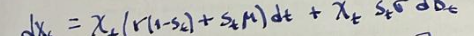

<Figure size 640x480 with 0 Axes>

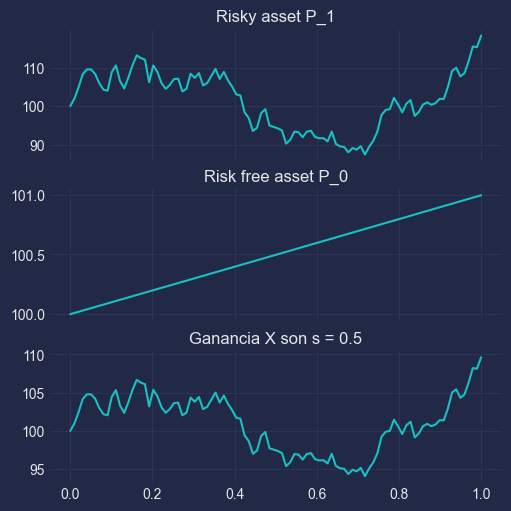

In [20]:
# Simulate the price path
time_grid1, price_path1 = simulate_stocastic_price_path(pi, mu1, sigma1, T, dt)
time_grid0, price_path0 = simulate_deterministic_price_path(pi, mu0, T, dt)

X = s*price_path0 + (1-s)*price_path1
# Print the simulated price path

plt.figure()
fig, axs = plt.subplots(3,1,layout = 'constrained', figsize = (5,5), sharex = True)
axs[0].plot(time_grid1,price_path1)
axs[1].plot(time_grid0,price_path0)
axs[2].plot(time_grid0,X)
axs[0].set_title('Risky asset P_1')
axs[1].set_title('Risk free asset P_0')
axs[2].set_title(f"Ganancia X son s = {s}")
plt.show()
j = 0.5
x_mesh = np.arange(0,dinero_maximo,j)

In [21]:
mat_A = func_mat_A(x_mesh,s)
l_y = [0]*len(x_mesh)
l_s = [0]*len(x_mesh)
l_s_sol = [0]*int(T/dt)
l_v_sol = [0]*int(T/dt)
l_x_sol = [0]*int(T/dt)
#  Buscar el x_k mas cercandano
V_prev = [0]*len(x_mesh)

for i in range(1,len(x_mesh)-1):
    x_k,x_k1 = xs_mas_cercano(x_mesh,x_mesh[i] + a(x_mesh[i],s)*dt)
    # interp(V^n-1, x +a dt) 
    if x_k1 is None:
        x_k1 = dinero_maximo
    if x_mesh[i] + a(x_mesh[i],s)*dt >=dinero_maximo:
        x_inter = dinero_maximo-j/2
    else:
        x_inter =  x_mesh[i] + a(x_mesh[i],s)*dt 
    parte_y_1 =intercep(U_k1=0,U_k=0,x_k =x_k,x_k1 = x_k1, x_interpolada=x_inter )#aqui los intercep son en relación a la dimension espacial
    #Aqui f = 0 pues lo que estamos contando es la suma de los impulsos(es decir K)
    # (M_nV^n-1)_i
    #Aqui como el operaedor es en base n la x es x_n_i y no x_{n-1}_i
    parte_y_2,s_partey2 = M(V_k1=0,V_K=0,l_x= x_mesh,x_interpolada=x_mesh[i]+j/2,st=s,p0_aux=price_path0[0],p1_aux=price_path1[0])
    l_aux = [0]*2
    num = 0


    for d in [0,1]:
        l_aux[num] = (1-d)*parte_y_1 + d*parte_y_2
    #Creo que mi y debería darme minimo un vector de tres de esas madres
    l_y[i] = np.max(l_aux)
    if l_aux[num] == parte_y_2:
        l_s[i] = s_partey2
    else:
        l_s[i] = s
V_new = np.linalg.solve(mat_A, l_y)
# Resto iteraciones


In [22]:
val_mas_cercano = xs_mas_cercano(x_mesh,X[0])[0]
ubi_val_mas_cercano = np.where(x_mesh==val_mas_cercano)
l_s_sol[0] = l_s[ubi_val_mas_cercano[0][0]]
s = l_s[ubi_val_mas_cercano[0][0]]
l_v_sol[0] = V_new[ubi_val_mas_cercano[0][0]]
l_x_sol[0] = X[0]

In [23]:
rebalanceos = 0
norebalanceos = 0
for j in range(1,int(T/dt)):
    l_y = [0]*len(x_mesh)
    l_s = [0]*len(x_mesh)
    for i in range(1,len(x_mesh)-1):
        x_k,x_k1 = xs_mas_cercano(x_mesh,x_mesh[i] + a(x_mesh[i],s)*dt)
        if x_k1 is None:
            x_k1 = dinero_maximo
            x_k = dinero_maximo-j
            
        if x_mesh[i] + a(x_mesh[i],s)*dt >=dinero_maximo:
            x_inter = dinero_maximo-j/2
            x_k1 = dinero_maximo
            x_k = dinero_maximo-j
        else:
            x_inter =  x_mesh[i] + a(x_mesh[i],s)*dt 


            
        parte_y_1 = intercep(U_k1=V_new[i+1],U_k=V_new[i],x_k =x_k,x_k1 = x_k1, x_interpolada=x_inter )
        parte_y_2,s_partey2 = M(V_k1=V_new[i+1],V_K=V_new[i],l_x= x_mesh, x_interpolada=x_mesh[i],st=s,p0_aux=price_path0[j],p1_aux=price_path1[j])

        # bl_y_parte1[i-1] = parte_y_1
        # bl_y_parte2[i-1] = parte_y_2

        l_aux_ys = [0]*2
        num = 0
        for d in [0,1]:
            l_aux_ys[num] = (1-d)*parte_y_1 + d*parte_y_2
            num+=1
        l_y[i] = np.max(l_aux_ys)
    #---------------------
        if l_y[i] == parte_y_2:
            l_s[i] = s_partey2
            rebalanceos +=1
        else:
            l_s[i] = s  
            norebalanceos +=1


    mat_A = func_mat_A(x_mesh,s)
    faltantes = len(x_mesh)-len(V_new) 
    V_new = np.linalg.solve(mat_A, l_y)
    faltantes = len(x_mesh)-len(V_new)
    V_new = np.concatenate([[0]*faltantes,V_new]) 
    # bmat_V[j] = V_new
    # bmat_y_parte1[j] = bl_y_parte1
    # bmat_y_parte2[j] = bl_y_parte2    
    val_mas_cercano = xs_mas_cercano(x_mesh,func_X1(price_path0[j],price_path1[j],s))[0]
    ubi_val_mas_cercano = np.where(x_mesh==val_mas_cercano)
    l_s_sol[j] = l_s[ubi_val_mas_cercano[0][0]]
    # if type(l_s[ubi_val_mas_cercano[0][0]]) is int:
    #     s = l_s[ubi_val_mas_cercano[0][0]]
    # else: 
    #     s = 0.5
    l_x_sol[j] = func_X1(price_path0[j],price_path1[j],s)
    l_v_sol[j] = V_new[ubi_val_mas_cercano[0][0]]
l_s_sol[0] = 0.5

In [24]:
x_sol = price_path0*l_s_sol + price_path1*(1-np.array(l_s_sol))
l_s_sol

[0.5,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.9500000000000001,
 0.9500000000000001,
 0.9500000000000001,
 0.9500000000000001,
 0.9500000000000001,
 0.9500000000000001,
 0.9500000000000001,
 0.9500000000000001,
 0.9500000000000001,
 0.9500000000000001,
 0.9500000000000001,
 0.9500000000000001,
 0.9500000000000001,
 0.9500000000000001,
 0.9500000000000001,
 0.9500000000000001,
 0.9500000000000001,
 0.9500000000000001,
 0.9500000000000001,
 0.9500000000000001,
 0.9500000000000001,
 0.9500000000000001,
 0.9500000000000001,
 0.9500000000000001,
 0.9500000000000001,
 0.9500000000000001,
 0.9500000000000001,
 0.9500000000000001,
 0.9500000000000001,
 0.9500000000000001,
 0.9500000000000001,
 0.9500000000000001,
 0.9500000000000001,
 0.95000000000

In [25]:
val_prev = l_s_sol[0]
num = 0
momentos_impulso = []
dirección_impulso = []
aumento_estetico = []
for i in l_s_sol[1:]:
    if val_prev !=i:
        momentos_impulso.append(num)
        if val_prev <i:
            dirección_impulso.append(0.1)
            aumento_estetico.append(-5)
        else:
            dirección_impulso.append(-0.1)
            aumento_estetico.append(5)
    val_prev = i
    num +=1

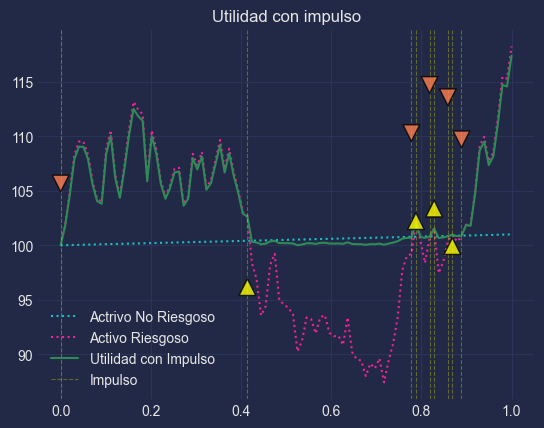

In [26]:
plt.figure()
# plt.plot(time_grid0,X, c= 'indianred')
plt.title("Utilidad con impulso")
plt.plot(time_grid0,price_path0,linestyle =  ':',label = "Actrivo No Riesgoso")
plt.plot(time_grid1,price_path1,linestyle =  ':',label = "Activo Riesgoso")
plt.plot(time_grid0,x_sol, c = 'seagreen',linewidth = 1.5,label = "Utilidad con Impulso")
num = 0
for i,d in zip(time_grid0[momentos_impulso],dirección_impulso):
    plt.annotate(
        '',  # Sin texto
        xy=(i, x_sol[num] + aumento_estetico[num] + d),  # Punto final de la flecha
        xytext=(i, x_sol[num] + aumento_estetico[num]),  # Punto inicial de la flecha
        arrowprops= dict(facecolor='yellow' if d > 0 else 'coral', shrink=0.001, alpha = 0.8) #'green' if d > 0 else 'red'
    )
    plt.axvline(i, linestyle = '--',linewidth = 0.8, color = "yellow", alpha = 0.3,label="Impulso" if i == 0 else "")
    num +=1
plt.legend()
plt.show()

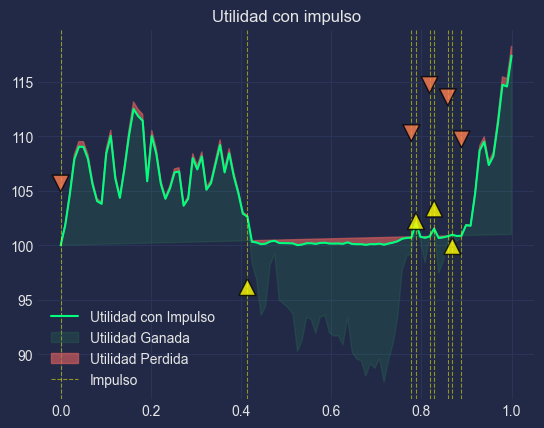

In [27]:
plt.figure()
# plt.plot(time_grid0,X, c= 'indianred')
plt.title("Utilidad con impulso")
plt.plot(time_grid0,x_sol,c='springgreen',label = "Utilidad con Impulso") #c = 'forestgreen'
plt.fill_between(time_grid0, price_path0, x_sol , where = (price_path0 <x_sol), color="seagreen",interpolate=True, alpha=0.2, label='Utilidad Ganada')
plt.fill_between(time_grid0, price_path1, x_sol , where = (price_path1 <x_sol), color="seagreen",interpolate=True, alpha=0.2) 
plt.fill_between(time_grid0, price_path0, x_sol , where = (price_path0 >x_sol), color="indianred",interpolate=True, alpha=0.7, label='Utilidad Perdida')
plt.fill_between(time_grid0, price_path1, x_sol , where = (price_path1 >x_sol), color="indianred",interpolate=True, alpha=0.7) 
num = 0
for i,d in zip(time_grid0[momentos_impulso],dirección_impulso):
    plt.annotate(
        '',  # Sin texto
        xy=(i, x_sol[num] + aumento_estetico[num] + d),  # Punto final de la flecha
        xytext=(i, x_sol[num] + aumento_estetico[num]),  # Punto inicial de la flecha
        arrowprops= dict(facecolor='yellow' if d > 0 else 'coral', shrink=0.001, alpha = 0.8) #'green' if d > 0 else 'red'
    )
    plt.axvline(i, linestyle = '--',linewidth = 0.8, color = "yellow", alpha = 0.5,label="Impulso" if i == 0 else "")
    num +=1
# plt.plot(time_grid0,price_path0,linestyle =  ':', linewidth = 3,label = "Actrivo No Riesgoso") #c= "dodgerblue"
# plt.plot(time_grid1,price_path1,linestyle =  ':',linewidth = 3,label = "Activo Riesgoso") #where=(y1 >= y2) c= "orangered"
plt.legend()
plt.show()
del num